# OpenEO Course Answers

This notebook contains answers to the exercises in exercises.ipynb.

In [1]:
! pip install geojson

In [2]:
import math

import geojson
from openeo import connect, Connection
from openeo.rest.datacube import DataCube
from shapely.geometry import Polygon
from typing import List, Dict, Tuple, Union
from pathlib import Path
import xarray as xr

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

In [4]:
# Connect to OpenEO backend and authenticate
openeo_platform_url = "openeo.cloud"

start = "2020-01-01"
stop = "2022-01-01"

# python client docs: https://open-eo.github.io/openeo-python-client/

con = connect(openeo_platform_url)
con.authenticate_oidc(provider_id="egi")

OIDC token response did not contain refresh token.


Authenticated using refresh token.


<Connection to 'https://openeocloud.vito.be/openeo/1.0.0/' with OidcBearerAuth>

In [5]:
# List collections
con.list_collections()

[{'description': 'Sentinel 1 GRD Sigma0, mosaic of all ascending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_ASCENDING',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-1',
   'C-SAR',
   'Level-3',
   'Radar',
   'Radar Backscatter'],
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S1_GRD_SIGMA0'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'Sentinel 1 GRD Sigma0, mosaic of all descending relative orbits. Backscatter values are provided as natural number, not in decibel. Provided by Terrascope.\n\n Use [this viewer](https://viewer.terrascope.be/?language=en&bbox=2.8531494643539195,50.29627033037724,6.36877446435392,51.454777120718546&overlay=true&bgLayer=Satellite&date=2020-10-15&layer=CGS_S1_GRD_SIGMA0) to explore the data.',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'S1_GRD_SIGMA0_DESCENDING',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-1',
   'C-SAR',
   'Level-3',
   'Radar',
   'Radar Backscatter'],
  'license': 'free',
  'links': [{'href': 'https://docs.terrascope.be/#/DataProducts/Sentinel-1/ProductsOverview',
    'rel': 'alternate',
    'title': 'Product web page.'},
   {'href': 'https://services.terrascope.be/wmts/v2',
    'rel': 'wmts',
    'wmts:layer': 'CGS_S1_GRD_SIGMA0'}],
  'providers': [{'name': 'Terrascope/VITO'}],
  'stac_extensions': ['datacube',
   'https://stac-extensions.github.io/eo/v1.0.0/schema.json'],
  'stac_version': '0.9.0',
  'title': 'Sentinel 1 GRD Sigma0 product, VH, VV and angle.'},
 {'description': 'FAPAR Level-3 product at 10m resolution. Covers selected areas globally. This FAPAR is derived directly from ESA L2A products. The FAPAR quantifies the fraction of the solar radiation absorbed by live leaves for the photosynthesis activity. Then, it refers only to the green and alive elements of the canopy. The FAPAR depends on the canopy structure, vegetation element optical properties, atmospheric conditions, and angular configuration. \n\nFAPAR is recognized as an Essential Climate Variable (ECV) by the Global Climate Observing System (GCOS).',
  'extent': {'spatial': {'bbox': [[-180, -56, 180, 83]]},
   'temporal': {'interval': [['2015-07-06T00:00:00Z', None]]}},
  'id': 'TERRASCOPE_S2_FAPAR_V2',
  'keywords': ['VITO',
   'TERRASCOPE',
   'COPERNICUS',
   'ESA',
   'Orthoimagery',
   'SENTINEL-2',
   'MSI',
   'Level-3',
   'Radiometry',
   'Plant Resource',
   'FAPAR'],
  'license': 'proprietary',
  'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
    'rel': 'license'},
   {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_FAPAR_V2',
    'rel': 'alternate'},
   {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_FAPAR',
    'rel': 'alternate',
    'title': 'Terrascope Viewer'},
   {'href': 'https:

In [6]:
con.describe_collection("SENTINEL2_L2A")

{'cube:dimensions': {'bands': {'type': 'bands',
   'values': ['B01',
    'B02',
    'B03',
    'B04',
    'B05',
    'B06',
    'B07',
    'B08',
    'B8A',
    'B11',
    'B12',
    'SCL',
    'relativeAzimuthAngles',
    'sunZenithAngles',
    'viewZenithAngles',
    'B09',
    'AOT',
    'SNW',
    'CLD',
    'CLP',
    'CLM',
    'sunAzimuthAngles',
    'viewAzimuthMean',
    'viewZenithMean',
    'dataMask']},
  't': {'extent': ['2015-07-06T00:00:00Z', None], 'type': 'temporal'},
  'x': {'axis': 'x',
   'extent': [-180, 180],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'},
  'y': {'axis': 'y',
   'extent': [-56, 83],
   'reference_system': {'$schema': 'https://proj.org/schemas/v0.2/projjson.schema.json',
    'area': 'World',
    'bbox': {'east_longitude': 180,
     'north_latitude': 90,
     'south_latitude': -90,
     'west_longitude': -180},
    'coordinate_system': {'axis': [{'abbreviation': 'Lat',
       'direction': 'north',
       'name': 'Geodetic latitude',
       'unit': 'degree'},
      {'abbreviation': 'Lon',
       'direction': 'east',
       'name': 'Geodetic longitude',
       'unit': 'degree'}],
     'subtype': 'ellipsoidal'},
    'datum': {'ellipsoid': {'inverse_flattening': 298.257223563,
      'name': 'WGS 84',
      'semi_major_axis': 6378137},
     'name': 'World Geodetic System 1984',
     'type': 'GeodeticReferenceFrame'},
    'id': {'authority': 'OGC', 'code': 'Auto42001', 'version': '1.3'},
    'name': 'AUTO 42001 (Universal Transverse Mercator)',
    'type': 'GeodeticCRS'},
   'step': 10,
   'type': 'spatial'}},
 'description': '[Sentinel-2 Level 2A](https://docs.terrascope.be/#/DataProducts/Sentinel-2/Level2A/Level2A) product, processed from L1C by Sen2Cor. \n Use the [Terrascope viewer](https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_RADIOMETRY) to explore the data. \n\n ',
 'extent': {'spatial': {'bbox': [[-180, -56, 180, 83], [-180, -56, 180, 83]]},
  'temporal': {'interval': [['2015-07-06T00:00:00Z', None],
    ['2016-11-01T00:00:00Z', None]]}},
 'id': 'SENTINEL2_L2A',
 'keywords': ['VITO',
  'TERRASCOPE',
  'COPERNICUS',
  'ESA',
  'Orthoimagery',
  'SENTINEL-2',
  'MSI',
  'Level-2A',
  'Radiometry',
  'Plant Resource',
  'TOC'],
 'license': 'proprietary',
 'links': [{'href': 'https://sentinel.esa.int/documents/247904/690755/Sentinel_Data_Legal_Notice',
   'rel': 'license'},
  {'href': 'https://services.terrascope.be/catalogue/description?collection=urn:eop:VITO:TERRASCOPE_S2_TOC_V2',
   'rel': 'alternate'},
  {'href': 'https://viewer.terrascope.be/?language=nl&bbox=0.9339867511378304,50.14520994379217,6.207424251137831,51.77292299745045&overlay=false&bgLayer=MapBox&date=2019-02-25T03:17:15.000Z&layer=CGS_S2_RADIOMETRY',
   'rel': 'alternate'},
  {'href': 'https://services.terrascope.be/wmts/v2',
   'rel': 'wmts',
   'wmts:layer': 'CGS_S2_RADIOMETRY'},
  {'href': 'https://collections.eurodatacube.com/stac/sentinel-2-l2a.json',
   'rel': 'self'},
  {'href': 'https://collections.

In [31]:
collection_id = "SENTINEL2_L2A"  # from list_collections

# take area of interest (e.g. geojson.io)
geojson_dict = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -6.248645782470703,
              41.275742324160106
            ],
            [
              -6.2381744384765625,
              41.275742324160106
            ],
            [
              -6.2381744384765625,
              41.282708545916584
            ],
            [
              -6.248645782470703,
              41.282708545916584
            ],
            [
              -6.248645782470703,
              41.275742324160106
            ]
          ]
        ]
      }
    }
  ]
}
bands = ["B02", "B03", "B04", "B08", "B11"]  # from describe_collection
fc = geojson.FeatureCollection(geojson_dict)
polygon = Polygon(list(geojson.utils.coords(fc)))

In [32]:
bounds = polygon.bounds
print(bounds)
bbox = {
    "west": bounds[0],
    "east": bounds[2],
    "south": bounds[1],
    "north": bounds[3],
    "crs": "EPSG:4326"
}

(-6.248645782470703, 41.275742324160106, -6.2381744384765625, 41.282708545916584)


In [33]:
dc_in = con.load_collection("SENTINEL2_L2A", spatial_extent=bbox, temporal_extent=[start, stop], bands=bands)

# Exercise 2

In [34]:
from pathlib import Path
from datetime import timedelta
import pandas as pd

from openeo import processes

In [35]:
# Create time intervals
dr = pd.date_range(start=start, end=stop, freq=f"YS")
t_intervals = [[str(d), str(dr[i+1])] for i, d in enumerate(dr[:-1])]
t_intervals

[['2020-01-01 00:00:00', '2021-01-01 00:00:00'],
 ['2021-01-01 00:00:00', '2022-01-01 00:00:00']]

In [36]:
# call datacube from previous step dc_in
dc: DataCube = dc_in \
    .aggregate_temporal(
        intervals=t_intervals,
        reducer=lambda data: processes.quantiles(data, probabilities=[0.2]),
        labels=[t_int[0] for t_int in t_intervals]
    )

In [37]:
band_names = ["blue", "green", "red", "nir", "swir"]

In [38]:
dc = dc.rename_labels(dimension="bands", source=bands, target=band_names)

In [39]:
green = dc.band("green")
nir = dc.band("nir")
ndwi = (green - nir) / (green + nir)

In [40]:
job = ndwi.execute_batch()

0:00:00 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': send 'start'
0:00:19 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': queued (progress N/A)
0:00:25 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': queued (progress N/A)
0:00:32 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': queued (progress N/A)
0:00:40 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': queued (progress N/A)
0:00:51 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': queued (progress N/A)
0:01:04 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': queued (progress N/A)
0:01:20 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': running (progress N/A)
0:01:39 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': running (progress N/A)
0:02:05 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': running (progress N/A)
0:02:35 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': running (progress N/A)
0:03:14 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': running (progress N/A)
0:04:02 Job 'vito-j-b247c7978fac4aa3a53de233ee6c2797': running (progress N/A)
0:

In [41]:
out_dir = Path("output")  # create output directory
out_dir.mkdir(parents=True, exist_ok=True)

results = job.get_results()  # get results
files = results.download_files(out_dir / "ex2")

In [42]:
files  # getting multiple files, not all dates are in (backend limitation)

[PosixPath('output/ex2/openEO_2020-01-01Z.tif'),
 PosixPath('output/ex2/openEO_2021-01-01Z.tif'),
 PosixPath('output/ex2/job-results.json')]

In [43]:
ds = xr.open_dataset(files[1])  # open first file
ds

<xarray.Dataset>
Dimensions:      (band: 1, x: 91, y: 82)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 7.304e+05 7.304e+05 ... 7.313e+05 7.313e+05
  * y            (y) float64 4.574e+06 4.574e+06 ... 4.573e+06 4.573e+06
    spatial_ref  int64 ...
Data variables:
    band_data    (band, y, x) float32 ...

In [44]:
da = ds.to_array("band_data").sel(band=1, band_data="band_data")  # convert data to array and select dimension to obtain 2d data structure
da

<xarray.DataArray (y: 82, x: 91)>
array([[-0.5129812 , -0.683597  , -0.6909091 , ..., -0.5145141 ,
        -0.5120601 , -0.5839765 ],
       [-0.5807393 , -0.6735823 , -0.67648315, ..., -0.47681043,
        -0.460293  , -0.4960116 ],
       [-0.6339203 , -0.6727129 , -0.6688588 , ..., -0.51240563,
        -0.52612484, -0.51862466],
       ...,
       [ 0.58125   ,  0.5521472 ,  0.556962  , ..., -0.54057425,
        -0.5091503 , -0.5130838 ],
       [ 0.55487806,  0.51975685,  0.5195195 , ..., -0.5632184 ,
        -0.53331304, -0.52764463],
       [ 0.5308642 ,  0.5468278 ,  0.5185185 , ..., -0.53564155,
        -0.5484822 , -0.54856277]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 7.304e+05 7.304e+05 ... 7.313e+05 7.313e+05
  * y            (y) float64 4.574e+06 4.574e+06 ... 4.573e+06 4.573e+06
    spatial_ref  int64 0
    band_data    <U9 'band_data'

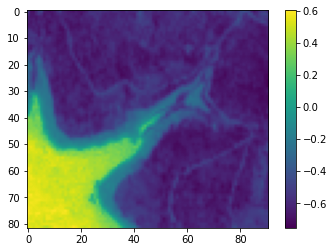

In [45]:
plt.imshow(da)  # single color image
plt.colorbar()

## Exercise 3

In [46]:
from openeo import processes

ndwi_min = ndwi.reduce_dimension(dimension="t", reducer="min")
mask = ndwi_min.apply(lambda val: processes.lte(x=val, y=-0.05))

ndwi_masked = ndwi.mask(mask)

In [52]:
job_masked = ndwi_masked.execute_batch()

0:00:00 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': send 'start'
0:00:24 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': queued (progress N/A)
0:00:31 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': queued (progress N/A)
0:00:39 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': queued (progress N/A)
0:00:48 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': queued (progress N/A)
0:00:58 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': queued (progress N/A)
0:01:12 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': queued (progress N/A)
0:01:29 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': queued (progress N/A)
0:01:49 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': queued (progress N/A)
0:02:14 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': running (progress N/A)
0:02:44 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': running (progress N/A)
0:03:23 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': running (progress N/A)
0:04:10 Job 'vito-j-5355a205e89d4987b04ec362354fb9a5': running (progress N/A)
0:05

In [53]:
results_masked = job_masked.get_results()
files_masked = results_masked.download_files(out_dir / "ex3")
files_masked

[PosixPath('output/ex3/openEO_2020-01-01Z.tif'),
 PosixPath('output/ex3/openEO_2021-01-01Z.tif'),
 PosixPath('output/ex3/job-results.json')]

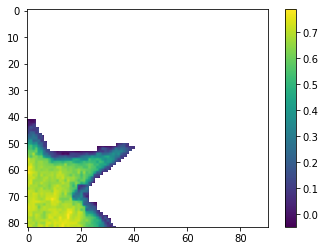

In [54]:
ds_masked = xr.open_dataset(files_masked[0])  # open first file
da_masked = ds_masked.to_array("band_data").sel(band=1, band_data="band_data")  # convert data to array and select dimension to obtain 2d data structure
plt.imshow(da_masked)
plt.colorbar()